<a href="https://colab.research.google.com/github/douglascdsantos/data_science/blob/main/projetos/analisando_os_dados_do_airbnb_(tokyo)/notebook/Analisando_os_Dados_do_Airbnb_(Tokyo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tóquio*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Tóquio, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Por que Tóquio?

<center><img alt="Tokyo"  width="70%" src="https://media0.giphy.com/media/8nklrlsjx4jem7evCj/200w.webp?cid=ecf05e47x4zwp7y5ct4xry9j8cig4f3wz1ai35iri2mwqqxk&rid=200w.webp&ct=g"></center>

Além de Tokyo ser o destino de casais assaltantes de bancos da série da Netflix, a capital do Japão conta com muita história e cultura por suas ruas e pontos turisticos, como:

- No bairro de Shibuya, podemos conhecer o cruzamento que leva o mesmo nome do bairro - *Shibuya Crossing* - local onde temos o encontro de 8 semáforos que quando fecham tem por volta de 2500 pessoas cruzando as ruas e ainda ao lado da estação de metro temos a estatua de bronze do Hachiko - este foi um cachorro que ficou famoso por acompanhar seu dono até a estação e o esperava até o fim do dia, e ele continuou fazendo isso por anos mesmo após a morte de seu dono (a história acabou ganhando um longa nos cinemas).

<center><img alt="shibuya" width="70%"  src="https://www.vounajanela.com/wp-content/uploads/2019/10/toqui-hospedagem-3.jpg"></center>

- No ano de 2021 também tivemos os Jogos Olímpicos e Paraolímpicos em Tóquio com a maioria dos eventos sendo realizada na capital e nos arredores. As cerimônias de abertura e encerramento, bem como a maioria dos eventos de atletismo foram cediados no Estádio Nacional do Japão, localizado na região de Shinjuku.

<center><img alt="goku_embaixador" width="70%"  src="https://see.news/wp-content/uploads/2020/02/Dragon-Ball-Z-640x375.jpg"></center>


## Objetivos
Nesta análise espera-se responder questões como:

- Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos de variáveis?
- Qual a porcentagem de valores ausentes no dataset?
- Qual o tipo de distribuição das variáveis?
- Há outliers presentes?
- Qual a correlação existente entre as variáveis
- Qual o tipo de imóvel mais alugado no Airbnb?
- Qual a localidade mais cara de Tokyo?

E as demais que aparecerem durante o desenvolvimento do projeto.

## Obtenção dos dados
Os dados utilizados estão disponiveis no portal [Inside Airbnb](http://insideairbnb.com/), basta procurar por `Tokyo`, a data de compilação do arquivo estava como 29 de setembro de 2021, para evitar alteração do arquivo, caso o arquivo viesse direito do portal, durante o desenvolvimento do projeto o arquivo foi carregado no GitHub, e pode se encontrado neste link.
Iremos utilizar o seguinte arquivo para nossa análise exploratória:
- `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations)*.

Dessa forma podemos iniciar.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# url do dataset salvo no github
url = 'https://raw.githubusercontent.com/douglascdsantos/data_science/main/projetos/analisando_os_dados_do_airbnb_(tokyo)/listings.csv'

# importação do dataset em um DataFrame
airbnb = pd.read_csv(url,
                     parse_dates = ['last_review'])

## Tratamento e seleção dos dados
Inicialmente vamos começar a ter contato com os dados, dessa forma vamos listar as features (colunas) e qual o seu significado

### Dicionário das Variáveis
- `id`: número único que identifica o imóvel;
- `name`: nome da propriedade;
- `host_id`: nome do proprietário (locador) do imóvel;
- `neighbourhood_group`: grupo do bairro;
- `neighbourhood`: bairro;
- `latitude`: coordenada de latitude da localização;
- `longitude`: coordenada de longitude da localização;
- `room_type`: tipo do quarto do anúncio;
- `price`: preço do aluguel;
- `minimum_nights`: quantidade mínima de noite;
- `number_of_reviews`: números de reviews que a acomodação possui;
- `last_review`: data do último review;
- `reviews_per_month`: reviews por mês;
- `calculated_host_listings_count`: quantidade de acomodações por anfitrião;
- `availability_365`: disponibilidade em 365 dias;
- `number_of_reviews_ltm`: número de reviews nos últimos 12 meses;
- `license`: licença.

Vamos então verificar as extremidades do nosso dataset, geralmente podemos pegar alguma inconsistência nas entradas dependendo da maneira de como é registrada.

In [3]:
# conferindo as primeiras 5 entradas
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2019-11-14,1.50,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7816,3,228,2020-01-18,2.33,1,216,0,M130000243
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.78,2,270,0,M130007760
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,14036,1,252,2020-02-12,2.73,3,365,1,M130002814
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,0.98,2,88,0,M130007760


In [4]:
# conferindo uma amostra aleatória de 5 entradas
airbnb.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4143,33841773,6min Akabane stiation/Free wifi/max 5 guests #301,253559407,Eri,NaN,Kita Ku,35.77317,139.71826,Entire home/apt,3779,1,39,2020-09-19,1.48,20,260,22,M130015247
499,13281991,"Light Breezy Studio Apt, 2 Stops to Shinjuku (#7)",36396507,Yuka,NaN,Shibuya Ku,35.67847,139.67879,Entire home/apt,5446,1,144,2021-04-01,2.46,6,60,10,Hotels and Inns Business Act | 渋谷区保健所 | 31渋健生収...
1413,22438774,空港至近!都心へ好アクセス!Free WIFI!!!,159057251,Ambition,NaN,Ota Ku,35.57600,139.69981,Private room,9600,2,1,2018-08-20,0.03,20,146,0,Special Economic Zoning Act | 28健生発第10206号
7112,42076974,Max5ppl/Ikebukuro4min /Airport Bus2min/Balcony/EV,63598456,Spring,NaN,Toshima Ku,35.72916,139.70432,Entire home/apt,9000,1,0,NaT,NaN,18,57,0,M130008841
7412,42438643,3min->JR Ueno Sta/Small Double/Breakfast,332234740,ﾎﾃﾙｳｨﾝｸﾞｲﾝﾀｰﾅｼｮﾅﾙｾﾚｸﾄ 上野･御徒町,NaN,Taito Ku,35.70969,139.77771,Private room,4871,1,27,2021-07-31,3.60,9,90,27,Hotels and Inns Business Act | 東京都台東区台東保健所長 小竹...


In [5]:
# conferindo as últimas 5 entradas
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
10665,52486420,new open/新宿/大久保5分/免费WiFi,310747973,Yama,NaN,Shinjuku Ku,35.704780,139.692704,Entire home/apt,5600,1,0,NaT,NaN,7,175,0,Hotels and Inns Business Act | 新宿区保健所 | 2新保衛環第94号
10666,52497948,48密や時間を気にせず友人たちと集まれる新築2階建貸切♪無料駐車あり☆目の前にスーパー☆シェ...,183877565,UI Home Company,NaN,Sumida Ku,35.731955,139.819147,Entire home/apt,14429,1,0,NaT,NaN,31,174,0,Hotels and Inns Business Act | 墨田区保健所 | 3墨福衛生環...
10667,52497968,【学生限定 男子専用】☆通学ラクラク～自宅とホステルの2拠点生活！気軽に１人暮らし体験！？ベッド②,147279325,Khaosan World Asakusa Ryokan&Hostel,NaN,Taito Ku,35.715706,139.791221,Shared room,1200,1,0,NaT,NaN,15,90,0,Hotels and Inns Business Act | 東京都台東区台東保健所 | 2...
10668,52498653,【学生限定 女子専用】☆通学ラクラク～自宅とホステルの2拠点生活！気軽に１人暮らし体験！？ベッド②,147279325,Khaosan World Asakusa Ryokan&Hostel,NaN,Taito Ku,35.714026,139.790688,Shared room,1200,1,0,NaT,NaN,15,90,0,Hotels and Inns Business Act | 東京都台東区台東保健所 | ...
10669,52499934,新御徒町徒步5分钟#秋叶原车站#艺术感十足房#机场直达45分#免费Wi-Fi,287778251,Hasegawa,NaN,Taito Ku,35.704133,139.783314,Private room,3100,1,0,NaT,NaN,10,359,0,M130017605


### Seleção das features de interesse
Afim de filtrar as features que nos interessa, por não ser tão compreensivel ler nomes em japonês, descartamos:
- `license`;
- `host_name`;
- `name`.

Aproveitando também para passar os valores de `price` de ienes para reais, no presente dia que desenvolvo esse projeto temos que 1 iene = 0,049 real, dessa forma temos

In [6]:
# criar uma cópia do dataframe
df = airbnb.copy()

# removendo as features que não nos interessa
df.drop(['license', 'host_name','name'],
        axis = 1,
        inplace = True)

# conversão da moeda de ienes para reais
iene_em_reais = 0.049
df.price = df.price * iene_em_reais

##**Análise dos Dados**
O presente *dataset* é uma versão resumida fornecida pelo Airbnb, no mesmo portal onde foi obtido os dados há uma versão com muito mais features.

###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
O atual possui 15 variáveis (lembrando que removemos 3 delas por questão de escopo do projeto) com 10670 entradas, também temos os tipos das variáveis.

In [7]:
# imprimir a quantidade de entradas e de variáveis
print(f'Entradas: {df.shape[0]}\nVariáveis: {df.shape[1]}\n')

# mostrando o tipo de cada variável
df.dtypes

Entradas: 10670
Variáveis: 15



id                                         int64
host_id                                    int64
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes no dataset?**
A respeito de dados ausentes temos:
- `neighbourhood_group` está completamente vazia, dessa forma podemos removê-la;
- `last_review` e `reviews_per_month` essa duas features com o mesmo valor, o que é esperado, uma vez que uma feature depende da outra, quanto ao percentual de dados ausente não é um problema pois é um comportamento normal, uma vez que é possível concluir uma transação sem dar uma avaliação.

In [8]:
(df.isnull().sum()/airbnb.shape[0] * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  19.568885
last_review                        19.568885
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

In [9]:
# removendo a variável 'neighbourhood_group'
df.drop(['neighbourhood_group'],
        axis = 1,
        inplace = True)

### **Q3. Qual o tipo de distribuição das variáveis?** 
Aqui temos somente a variável `availability_365` com uma maior dispersão, as de mais mostra que temos um valor alvo, mas isso se dá em razão de valores muitos altos em nossa amostra, como por exemplo em `price`, `minimum_nights`, as de mais é esperado que tenha valores altos como o número de reviews e suas variantes


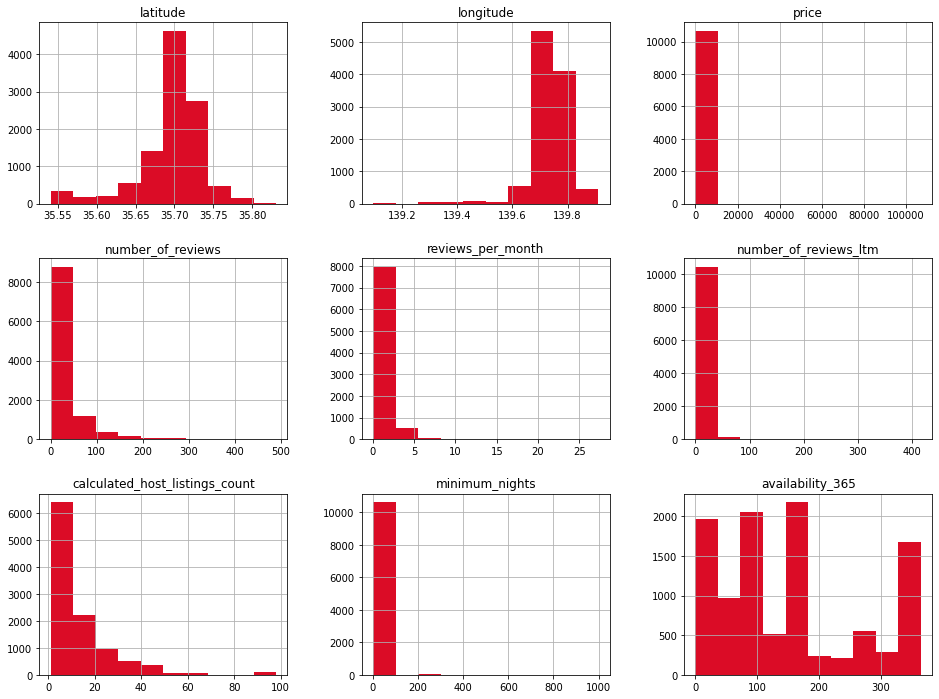

In [10]:
# plotando um histograma das variáveis númericas
df[['latitude','longitude', 'price', 'number_of_reviews', 'reviews_per_month','number_of_reviews_ltm', 'calculated_host_listings_count', 'minimum_nights','availability_365']].hist(color = '#db0c26',figsize=(16,12));

### **Q4. Há *outliers* presentes?**
Por não seguir uma distribuição, há indícios de presença de *outliers* em `price` e `mininum_nights`, vamos conferir algumas medidas estatísticas dessas variáveis

In [11]:
# resumo estatístico das varíaveis de interesse
df[['price','minimum_nights']].describe()

,price,minimum_nights
count,10670.000000,10670.000000
mean,627.875837,3.594283
std,2078.308955,24.674502
min,0.000000,1.000000
25%,208.593000,1.000000
50%,343.000000,1.000000
75%,606.399500,2.000000
max,107065.000000,999.000000


Com base no resumo estatístico, temos que:
- a variável `price` possui média de 627 reais, com 75% dos dados abaixo de 606,40 e o valor máximo chega 107065,00;
- quanto a variável `minimum_nights` temos valores acima de 365 dias no ano, sendo que 75% dos dados está abaixo de 2.

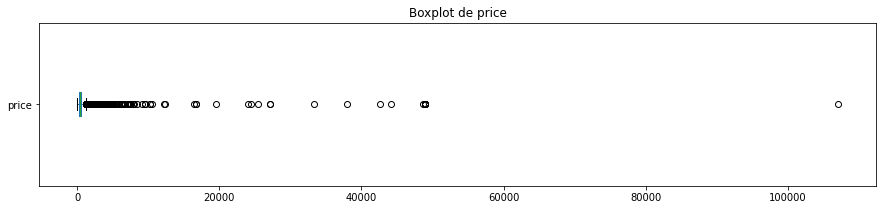


Valores acima de 2500 da variável price temos 208 entradas, que correspondem 1.95% do nosso dataset



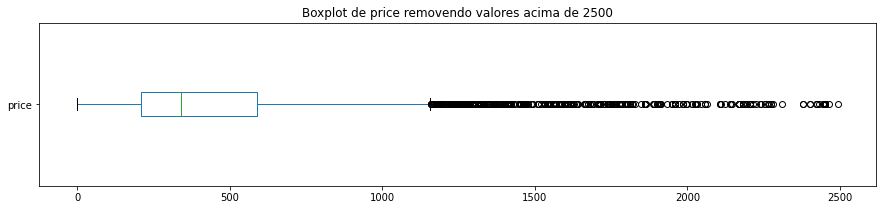

In [12]:
# boxplot price
df.price.plot.box(vert=False, figsize = (15,3));
plt.title('Boxplot de price')
plt.show()

# ver quantidade de valores acima de 1500 para price
valor_corte_price = 2500
print(f'''\nValores acima de {valor_corte_price} da variável price temos {len(df[df.price > valor_corte_price])} entradas, que correspondem {((len(df[df.price > valor_corte_price]) / df.shape[0])):.2%} do nosso dataset\n''')

# boxplot da nova seleção de price
df.price[df.price <= valor_corte_price].plot.box(vert=False, figsize = (15,3));
plt.title(f'Boxplot de price removendo valores acima de {valor_corte_price}')
plt.show()

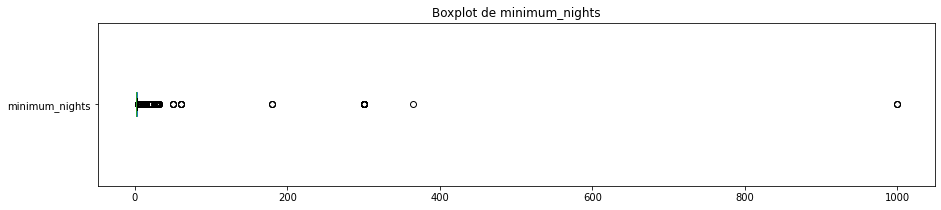


Para valores acima de 30 dias da variável minimum_nights temos 56 entradas, que correspondem 0.52% do nosso dataset



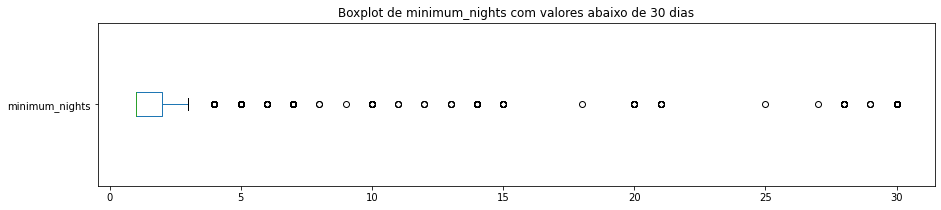

In [13]:
# boxplot de minimum_nights
df.minimum_nights.plot.box(vert=False, figsize = (15,3));
plt.title('Boxplot de minimum_nights')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
valor_corte_nights = 30
print(f'''\nPara valores acima de {valor_corte_nights} dias da variável minimum_nights temos {len(df[df.minimum_nights > valor_corte_nights])} entradas, que correspondem {((len(df[df.minimum_nights > valor_corte_nights]) / df.shape[0])):.2%} do nosso dataset\n''')

# bozplot da nova seleção de minimum_nights
df.minimum_nights[df.minimum_nights <= valor_corte_nights].plot.box(vert=False, figsize = (15,3));
plt.title(f'Boxplot de minimum_nights com valores abaixo de {valor_corte_nights} dias')
plt.show()

Dessa maneira vamos tirar entradas em que:
- `price` seja maior que 2500, temos 208 entradas que correspondem 1.95% do nosso dataset;
- `minimum_nights` que seja maior que 30 dias, dessa temos 56 entradas que correspondem a 0.52% do nosso dataset.

As de mais variáveis não foi realizado o boxplot em razão de que é um comportamento esperado, por exemplo uma acomodação pode muito bem ter muitas avaliações (reviews).

####Histogramas sem outliers
Verificando novamente os histogramas, em nosso dataset limpo notamos de que `price` tem um valor alvo de até 500 reais, na visualização anterior a conclusão visual que teriamos é de até 10000 reais

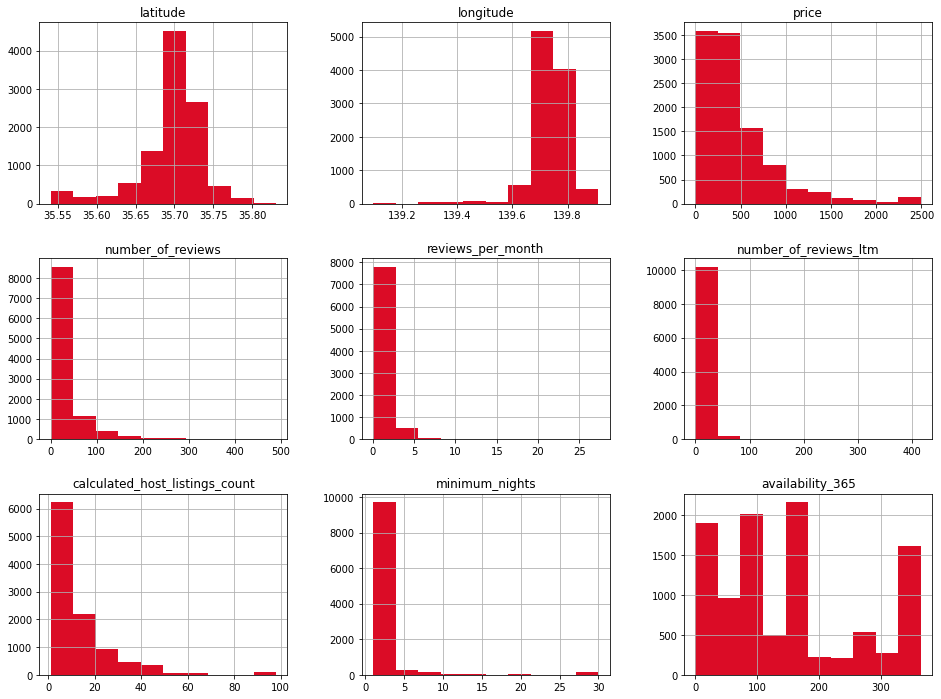

In [14]:
# filtrando os outliers
df_clean = df.query('price <= @valor_corte_price and minimum_nights <= @valor_corte_nights').copy()

# plotando nomente o histograma por variável
df_clean[['latitude','longitude', 'price', 'number_of_reviews', 'reviews_per_month','number_of_reviews_ltm', 'calculated_host_listings_count', 'minimum_nights','availability_365']].hist(color = '#db0c26',figsize=(16,12));

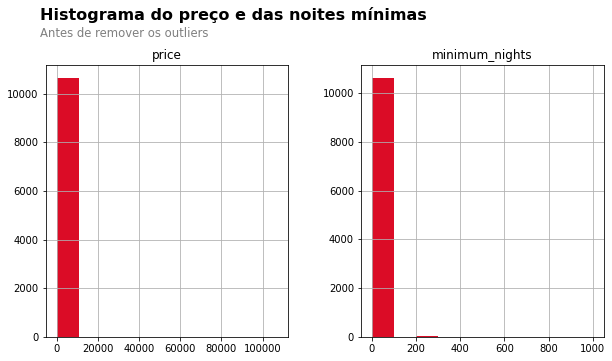

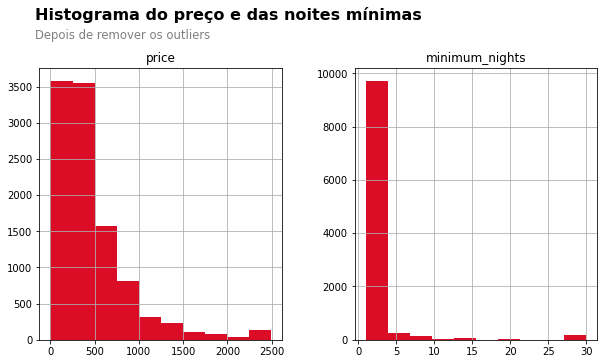

In [15]:
# histograma antes da remoção
df[['price', 'minimum_nights']].hist(color = '#db0c26',figsize=(10,5));
plt.text(-1500,13000,
         'Histograma do preço e das noites mínimas',
         fontsize = 16,
         color = 'black',
         weight = 'bold')
plt.text(-1500,12300,
         'Antes de remover os outliers',
         fontsize = 11.6,
         color = 'gray')
plt.show();

# histograma depois da remoção
df_clean[['price', 'minimum_nights']].hist(color = '#db0c26',figsize=(10,5));
plt.text(-42.5,12000,
         'Histograma do preço e das noites mínimas',
         fontsize = 16,
         color = 'black',
         weight = 'bold')
plt.text(-42.5,11300,
         'Depois de remover os outliers',
         fontsize = 11.6,
         color = 'gray');
plt.savefig('hist_depois')
plt.show()

###Q5. Preço e noites minimas das acomodações pós remoção dos outliers 
Temos que o valor médio está em 477 reais e de que a noite minima está concentrada em 2.

In [16]:
# extraindo um resumo estratistico das variáveis price e minimum_nights
df_clean[['price','minimum_nights']].describe()

,price,minimum_nights
count,10409.000000,10409.000000
mean,477.291747,2.204438
std,417.223444,4.084651
min,0.000000,1.000000
25%,208.593000,1.000000
50%,342.510000,1.000000
75%,588.000000,2.000000
max,2493.806000,30.000000


###**Q6. Qual a correlação existente entre as variáveis**
Correlação significar que que há alguma relação entre duas variáveis, como a inflação e o preço dos produtos de consumo, então, quando temos um aumento no índice da inflação por consequência temos um aumento dos preços, neste caso temos uma correlação positiva pois ambas crescem juntas, caso com o aumento de uma observamos o declínio da outra seria uma correlação negativa.

Dessa maneira vamos utilizar de uma matriz de correlação para avaliar se o coeficiente de correlação e também de maneira visual, para isso vamos utilizar de:
- matriz de correlação;
- heatmap com base nessa correlação.

In [17]:
# selecionando as variasveis para verificar a correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'last_review','reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']].corr()

# mostrar matriz
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.018298,-0.002381,0.026715,0.010926,-0.059315,-0.009431
minimum_nights,-0.018298,1.000000,-0.027510,-0.065953,-0.062579,-0.008667,-0.064576
number_of_reviews,-0.002381,-0.027510,1.000000,0.666650,-0.151767,0.023078,0.410055
reviews_per_month,0.026715,-0.065953,0.666650,1.000000,-0.115135,-0.001017,0.707772
calculated_host_listings_count,0.010926,-0.062579,-0.151767,-0.115135,1.000000,0.064447,-0.058432
availability_365,-0.059315,-0.008667,0.023078,-0.001017,0.064447,1.000000,0.005925
number_of_reviews_ltm,-0.009431,-0.064576,0.410055,0.707772,-0.058432,0.005925,1.000000


Verificamos de que há baixa correlação entre os dados, excerto entre `number_of_reviews_ltm` e `reviews_per_month` o que nos indica de que boa parte dos `reviews_per_month` foram nos últimos 12 meses.

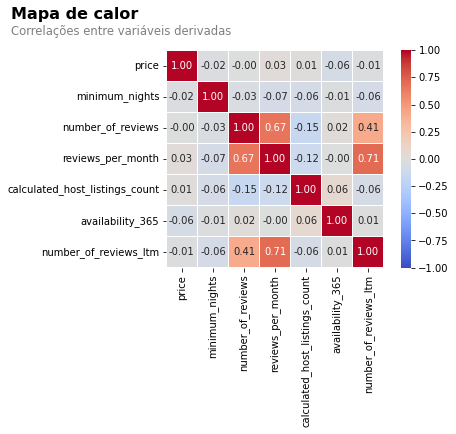

In [18]:
# mapa de calor da correlação
sns.heatmap(corr, cmap = 'coolwarm', fmt='.2f', square=True, linewidths = 0.1, linecolor='white',annot=True, vmin=-1, vmax=1);
plt.text(-5,-1,
         'Mapa de calor',
         fontsize = 16,
         color = 'black',
         weight = 'bold')
plt.text(-5,-0.5,
         'Correlações entre variáveis derivadas',
         fontsize = 11.6,
         color = 'gray');

Será que se selecionarmos bairros com os preços mais altos teriamos alguma correlação ? veremos a seguir

### **Q7. Qual a localidade mais cara do Tokyo?**

Para isso vamos fazer um agrupamento pela variável `neighbourhood` calculando a média das entradas da variável `price`, também vamos trazer a contagem de entradas por bairro e a média de avaliações.

In [20]:
# agrupamento por bairro
price = df_clean.groupby('neighbourhood').agg({'price': 'mean','neighbourhood': 'count', 'number_of_reviews': 'mean'}).sort_values(by = 'price', ascending = False).rename(columns = {'price': 'preço médio','neighbourhood': 'entradas','number_of_reviews': 'qtd média de avaliações'})
price.head(10)

,preço médio,entradas,qtd média de avaliações
neighbourhood,,,
Komae Shi,839.823250,4,63.500000
Kodaira Shi,819.113400,5,20.600000
Minato Ku,728.489376,415,25.127711
Chiyoda Ku,716.696740,181,11.353591
Mitaka Shi,682.400727,11,40.181818
Musashino Shi,592.671333,6,18.833333
Shibuya Ku,558.481449,577,41.989601
Chofu Shi,544.906385,13,40.846154
Taito Ku,528.179508,1578,22.859316


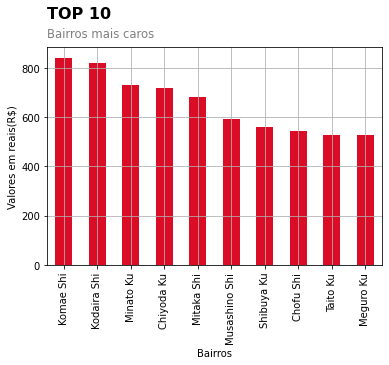

In [21]:
price.head(10)['preço médio'].plot(kind = 'bar',color = '#db0c26',grid=True, yticks=range(0,801,200))
plt.text(-0.5,1000,
          f'TOP 10',
          fontsize = 16,
          color = 'black',
          weight = 'bold')
plt.text(-0.5,925,
          f'Bairros mais caros',
          fontsize = 11.6,
          color = 'gray');
plt.xlabel('Bairros')
plt.ylabel('Valores em reais(R$)')
plt.show()

Acima, vemos que o bairro com média de preço mais cara é *Komae Shi* seguida de *Kodaira Shi*, entretanto se conferirmos a coluna de entradas, notamos que são bem poucas acomodações nesses bairros, ou seja, estamos lidando com um espaço amostral pequeno o qual é a média mais sensível a variações.

Respondendo o insight da questão anterior vamos ver a matriz de correlação dos 3 bairros com menor número de entradas dentre o nosso top 10 em `price`:

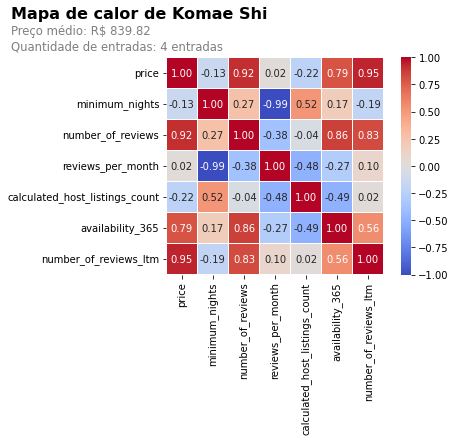

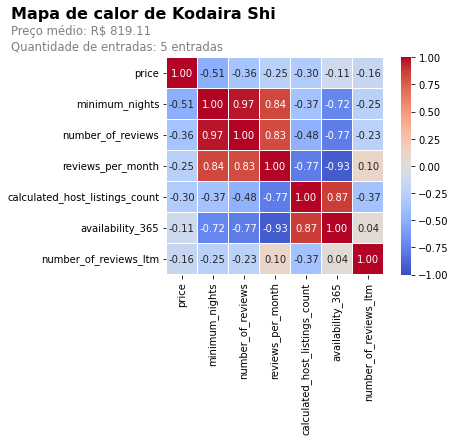

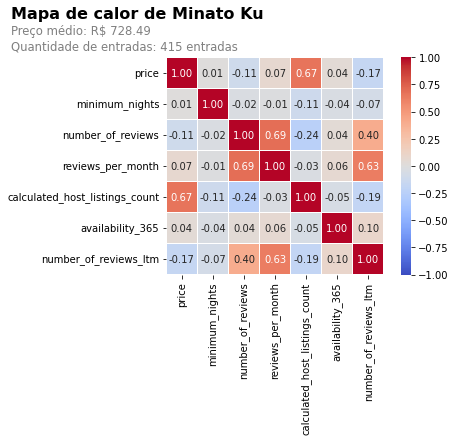

In [22]:
# correlação dos TOP 3 bairros mais caros
for bairro in price.sort_values(by = 'preço médio', ascending = False).iloc[0:3].index:
  corr = df_clean.query('neighbourhood == @bairro')[['price', 'minimum_nights', 'number_of_reviews', 'last_review','reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']].corr()
  sns.heatmap(corr, cmap = 'coolwarm', fmt='.2f', square=True, linewidths = 0.1, linecolor='white',annot=True, vmin=-1, vmax=1);
  plt.text(-5,-1.25,
           f'Mapa de calor de {bairro}',
           fontsize = 16,
           color = 'black',
           weight = 'bold')
  plt.text(-5,-0.75,
           f'Preço médio: R$ {price.loc[bairro,"preço médio"]:0.2f}',
           fontsize = 11.6,
           color = 'gray');
  plt.text(-5,-0.25,
           f'Quantidade de entradas: {price.loc[bairro,"entradas"]} entradas',
           fontsize = 11.6,
           color = 'gray');
  plt.show()

Acima, vemos que há várias correlações acima de 75% entre variáveis esse comportamento se deu em razão do tamanho da amostra como dito anteriormente.

Agora vejamos quando pegamos bairros com as maiores amostras

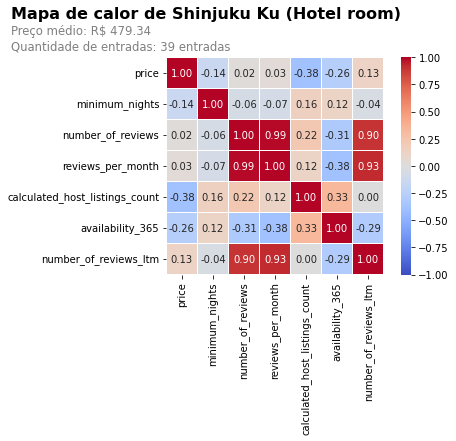

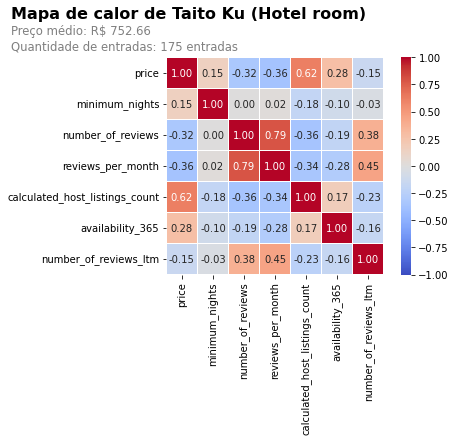

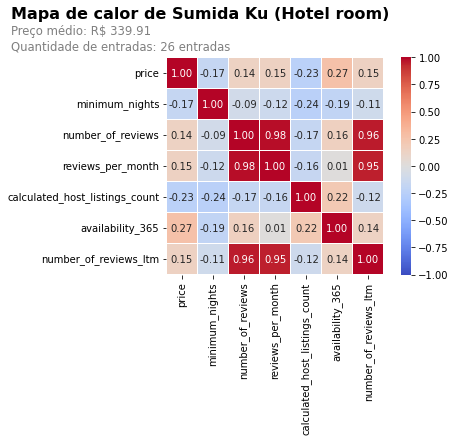

In [23]:
# correlação dos TOP 3 com maior quantidade de entradas

for bairro in price.sort_values(by = 'entradas',ascending=False).iloc[0:3].index:
  corr = df_clean.query('neighbourhood == @bairro and room_type == "Hotel room"')[['price', 'minimum_nights', 'number_of_reviews', 'last_review','reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']].corr()
  sns.heatmap(corr, cmap = 'coolwarm', fmt='.2f', square=True, linewidths = 0.1, linecolor='white',annot=True, vmin=-1, vmax=1);
  plt.text(-5,-1.25,
           f'Mapa de calor de {bairro} (Hotel room)',
           fontsize = 16,
           color = 'black',
           weight = 'bold')
  preco = df_clean.query('neighbourhood == @bairro and room_type == "Hotel room"')['price'].mean()
  plt.text(-5,-0.75,
           f'Preço médio: R$ {preco:0.2f}',
           fontsize = 11.6,
           color = 'gray');
  entradas = df_clean.query('neighbourhood == @bairro and room_type == "Hotel room"').shape[0]
  plt.text(-5,-0.25,
           f'Quantidade de entradas: {entradas} entradas',
           fontsize = 11.6,
           color = 'gray');
  plt.show()

Dessa forma vemos que há poucas correlações, como:
- `price` com `calculated_host_listings_count`, podemos especular que pessoas ou empresas, que utilizam o serviço, que possuem várias acomodações tendem a cobrar um preço mais elevado
- já as que relacionam `number_of_reviews` com suas variantes (por mês e a nos últimos 12 meses) é esperado visto que as variantes são calculadas com base no número de reviews.

###**Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

Temos de que o Quarto de hotel é o mais caro seguido por casa ou apartamento inteiro, aqui não temos informação a respeito de quantos m² se trata o lugar ou de quantos quartos ou banheiros possui para fazermos alguma comparação justa entre essas duas classes.

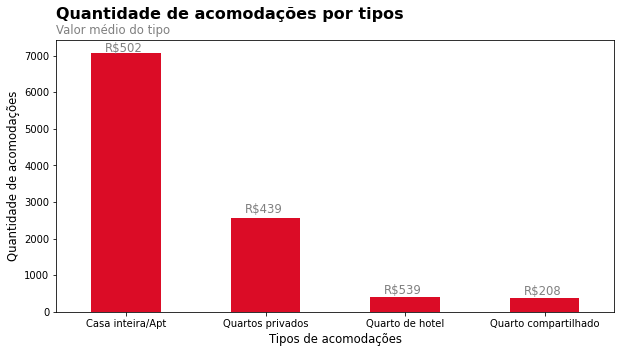

In [121]:
# agrupamento por tipo da acomodação
tipos_de_acomodacao = df_clean.groupby(['room_type']).agg({'price': 'mean', 'room_type': 'count'}).rename(columns = {'price': 'preço','room_type': 'entradas'}).sort_values(by = 'entradas', ascending = False)
# alteração de indice
tipos_de_acomodacao.index = ['Casa inteira/Apt', 'Quartos privados', 'Quarto de hotel', 'Quarto compartilhado']
# plotando gráfico
tipos_de_acomodacao['entradas'].plot(kind = 'bar',color = '#db0c26', figsize = (10,5))
plt.text(-0.5,8000,
          f'Quantidade de acomodações por tipos',
          fontsize = 16,
          color = 'black',
          weight = 'bold')
plt.text(-0.5,7600,
          f'Valor médio do tipo',
          fontsize = 11.6,
          color = 'gray');
plt.text(-0.15,7100,
          f'R$502',
          fontsize = 11.6,
          color = 'gray');
plt.text(0.85,2700,
          f'R$439',
          fontsize = 11.6,
          color = 'gray');
plt.text(1.85,500,
          f'R$539',
          fontsize = 11.6,
          color = 'gray');
plt.text(2.85,450,
          f'R$208',
          fontsize = 11.6,
          color = 'gray');
plt.xticks(rotation=0)
plt.xlabel('Tipos de acomodações', fontsize = 11.6)
plt.ylabel("Quantidade de acomodações", fontsize = 11.6)
plt.show()

Como são fornecidas as latitudes e longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


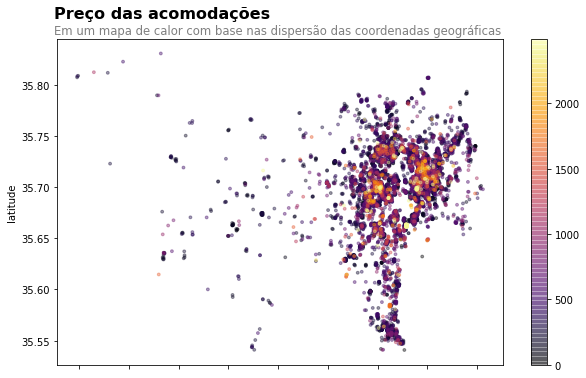

In [126]:
# plotar os imóveis pela latitude-longitude e ordenados pela variável price para melhor visualização
df_clean.sort_values(by='price',ascending = True).plot(kind = 'scatter',
            x = 'longitude',
            y = 'latitude',
            alpha = 0.4,
            c = df_clean.sort_values(by='price',ascending = True).price,
            s=8, 
            cmap = 'inferno',
            figsize=(10,6))
plt.text(139.05,35.865,
         'Preço das acomodações',
         fontsize = 16,
         color = 'black',
         weight = 'bold')
plt.text(139.05,35.85,
         'Em um mapa de calor com base nas dispersão das coordenadas geográficas',
         fontsize = 11.6,
         color = 'gray')
plt.show()

### **Conclusões**
Foi realizado apenas uma análise superficial nesses dados resumidos do Airbnb, mas já foi possível observar o comportamento de *outliers*, de como pequenos espaços amostrais afeta o comportamento da média e das correlações em por consequência os insights que tiramos dos dados.

É válido lembrar que o nosso dataset de estudo é uma versão resumida, pois trata-se de uma abordagem inicial. Para uma análise exploratória mais completa recomenda-se utilizar o conjunto completo com 106 variáveis disponíveis.
